### Metis DS Challenge Part 2 - Chicago Traffic Data - Exploratory Data Analysis
#### Xinru Cheng, Aug 11, 2019

The City of Chicago installed automatic speed cameras for Child Safety Zones. This notebook explores the dataset "Speed Camera Violations" which reflects the daily volume of violations that have occurred in Children's Safety Zones for each camera. The data reflects violations that occurred from July 1, 2014 until present, minus the most recent 14 days. See more information about the dataset here:https://data.cityofchicago.org/Transportation/Speed-Camera-Violations/hhkd-xvj4

#### Questions:
* 1 What is the average number of citations issued per camera, per day?
* 2 On which day of the week are the most citations issued?
* 3 Has the number of active cameras increased or decreased over the collection period?
* 4 Any interesting patterns or specific outliers in the data?

We start by importing some Python libraries, and loading the data:

In [209]:
import pandas as pd
import numpy as np
import matplotlib
import datetime

In [210]:
data = pd.read_csv("./Speed_Camera_Violations.csv") 

In [211]:
data.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [212]:
#Check how many entries for each column are null
data.isnull().sum()

ADDRESS              0
CAMERA ID            0
VIOLATION DATE       0
VIOLATIONS           0
X COORDINATE      6562
Y COORDINATE      6562
LATITUDE          6562
LONGITUDE         6562
LOCATION          6562
dtype: int64

The columns we need (Camera ID, VIOLATION DATE, and VIOLATIONS) do not have null values, so we can proceed

In [213]:
ids = data['CAMERA ID'].unique()
len(ids) #number of unique cameras

162

**Q1. Average number of citations issued per camera, per day**



In [214]:
df=data[['CAMERA ID','VIOLATION DATE','VIOLATIONS']]
df.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
0,CHI065,07/08/2014,65
1,CHI010,07/16/2014,56
2,CHI069,07/08/2014,10
3,CHI010,07/26/2014,101
4,CHI010,07/27/2014,92


In [215]:
gpvio = df['VIOLATIONS'].groupby(df['CAMERA ID'])
gpvio.mean().reset_index(name='avg_violations_per_cam') 
#average violations per camera per day 

,CAMERA ID,avg_violations_per_cam
0,CHI003,116.335859
1,CHI004,34.781192
2,CHI005,12.046569
3,CHI007,59.697837
4,CHI008,19.142241
5,CHI009,46.374004
6,CHI010,55.978475
7,CHI011,15.503542
8,CHI013,43.584568
9,CHI014,58.330670


**The dataframe above shows the average number of violation citations per day for each camera. **


The question is worded in a way that may cause some confusion, though.
If, however, we interpret the question "average per camera per day" to mean we want one final result averaging over all cameras, we would divide the sum by 162 which is the number of active and unique cameras in this dataset:

In [216]:
gpmean=gpvio.mean().reset_index(name='avg_violations_per_cam')
sum(gpmean['avg_violations_per_cam'])/162  

25.835382801473404

So we have an average of about 26 daily violations across all cameras (even though they are active over different days). The first approach which outputs a dataframe that includes **a daily average for each active camera** is preferred.


(Note that, if Question 1 was interpreted in yet another way, to mean the average citations for all cameras over the entire duration for which we have data (this makes less sense since the cameras are active on different days), we would sum up the original 'VIOLATIONS' column and divide by the total number of unique active cameras which is the number of rows of the df above, 162 (which we also found near the beginning of the notebook). 

In [217]:
sum(df['VIOLATIONS'])/162

30399.524691358023

As we can see the result above is unrealistically large, because we do not divide by the days (essentially an average of violations for one camera, assuming it operates over all the active days). This third interpretation is likely wrong, and the previous two approaches make more sense. 

------------

**Q2. On which day of the week are the most citations issued?**


In [218]:
#before converting violation date column to days of the week, check the number of unique dates first
uniquedates=df['VIOLATION DATE'].unique()
len(uniquedates)  #there are 1637 unique dates in this df, shorter than len(df)=170521

1637

In [219]:
from dateutil import parser 

week = []
for item in range(len(uniquedates)):
    date = df['VIOLATION DATE'][item]
    week.append(datetime.datetime.strftime(parser.parse(date), "%A"))
#print(week[:5])
#print(len(week))

Where week contains all the unique days from the data, converted into days of the week. 

At this point to find which day of the week has the most violation citations, we can either manipulate the data to find the violation date of the maximum number of violations (all cameras) and what day of the week it is, or plot total violations versus days of the week (sort of like a histogram tallying number of violations for each of the seven days.

However both approaches require merging the week day data with the cleaned dataframe first (using 'Violations' as key)

In [220]:
len(week)

1637

In [221]:
weekdays=pd.DataFrame(week) #convert list into df to merge

In [222]:
gpcam = df['CAMERA ID'].groupby(df['VIOLATION DATE'])
len(gpcam)

1637

In [223]:
#pd.merge(gpcam,weekdays) 
#---not working, gpcam is a groupby object, can't merge with df
##need to merge weekdays with original df somehow - even if merge with gpcam (same len), don't have violations column

instead of merging right away, try finding days of top citations using sort_values first


In [224]:
df.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
0,CHI065,07/08/2014,65
1,CHI010,07/16/2014,56
2,CHI069,07/08/2014,10
3,CHI010,07/26/2014,101
4,CHI010,07/27/2014,92


In [225]:
df.sort_values(by=['VIOLATIONS','VIOLATION DATE'],ascending=False)

,CAMERA ID,VIOLATION DATE,VIOLATIONS
34570,CHI149,06/06/2015,479
33231,CHI149,05/23/2015,479
36290,CHI149,06/21/2015,477
34894,CHI149,06/13/2015,471
31877,CHI149,05/16/2015,458
37711,CHI149,06/27/2015,444
40363,CHI149,08/15/2015,421
46940,CHI149,10/17/2015,418
33562,CHI149,05/31/2015,415
43116,CHI149,09/05/2015,412


After sorting data by violations, we see the five highest number of violations all occurred for the same camera (ID 149) during the summer of 2015. (interesting finding for Q4).

We now convert those five days to days of the week.

In [226]:
datetime.datetime.strftime(parser.parse('2015-06-06'), "%A")

'Saturday'

The date with the highest violations, 2015-06-06 is a Saturday.

In [227]:
datetime.datetime.strftime(parser.parse('2015-05-23'), "%A")

'Saturday'

In [228]:
datetime.datetime.strftime(parser.parse('2015-06-21'), "%A")

'Sunday'

In [229]:
datetime.datetime.strftime(parser.parse('2015-06-13'), "%A")

'Saturday'

In [230]:
datetime.datetime.strftime(parser.parse('2015-05-16'), "%A")

'Saturday'

The remaining of the dates with the top five violations are also mostly Saturdays. Suggesting **Saturday** has the most citations issued. Also the neighbourhood with CAMERA ID CHI149 is not safe for children.

-----------------

**Q3 Has the number of active cameras increased or decreased over the collection period?**

To answer this, we need to find the number of active cameras on the first and last day of the collection period

In [231]:
df.tail()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
170516,CHI076,12/22/2018,14
170517,CHI009,12/22/2018,45
170518,CHI055,12/22/2018,12
170519,CHI072,12/06/2018,2
170520,CHI069,12/22/2018,32


In [232]:
df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'])

df.sort_values(by=['VIOLATION DATE'])

df.head()


/Library/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CAMERA ID,VIOLATION DATE,VIOLATIONS
0,CHI065,2014-07-08,65
1,CHI010,2014-07-16,56
2,CHI069,2014-07-08,10
3,CHI010,2014-07-26,101
4,CHI010,2014-07-27,92


In [233]:
#df.sort_values(by=['VIOLATION DATE'])
df.tail()  #*not sure why getting NaT earlier

,CAMERA ID,VIOLATION DATE,VIOLATIONS
170516,CHI076,2018-12-22,14
170517,CHI009,2018-12-22,45
170518,CHI055,2018-12-22,12
170519,CHI072,2018-12-06,2
170520,CHI069,2018-12-22,32


In [234]:
df['VIOLATION DATE'].min()

Timestamp('2014-07-01 00:00:00')

In [235]:
df['VIOLATION DATE'].max()

Timestamp('2018-12-23 00:00:00')

Now we know the collection period is from 2014-07-01 to 2018-12-23, which makes sense. 

In [236]:
gpcam = df['CAMERA ID'].groupby(df['VIOLATION DATE'])
gpcam.size().reset_index(name='num_cams_per_day') 

,VIOLATION DATE,num_cams_per_day
0,2014-07-01,95
1,2014-07-02,92
2,2014-07-03,94
3,2014-07-04,62
4,2014-07-05,63
5,2014-07-06,60
6,2014-07-07,97
7,2014-07-08,98
8,2014-07-09,97
9,2014-07-10,97


For this collection period, we started with 95 active cameras on 2014-07-01, and ended with 74 active cameras on 2018-12-23. So the number of active cameras **decreased** in this collection period.*

*Here I assumed the number of citations will be roughly the same throughout the year, neglecting the possible effect of school and holiday seasons, and only compared the start and end of the collection period

---------------

**Q4. Any interesting patterns or specific outliers in the data?**

*Number of Violations*

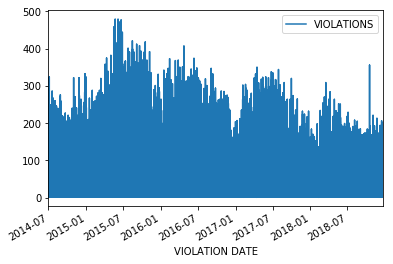

In [237]:
import matplotlib.pyplot as plt

#plot violations versus date
df.plot(kind='line',x='VIOLATION DATE',y='VIOLATIONS')
plt.show()

The plot above shows the number of violations per day decreasing overall. There is an oulier in later 2018.

In [238]:
df.describe()

,VIOLATIONS
count,170521.000000
mean,28.880449
std,36.636151
min,1.000000
25%,7.000000
50%,16.000000
75%,37.000000
max,479.000000


From this table of summary statistics as well as the plot above, we see the maximum number of daily violations is 479 (sum of all active cameras on that day), which occurred in the Summer of 2015. And the minimum is 1. The daily average of violations is about 29.
(There also seems to be fewer violations around January each year, bear in mind  not all cameras are active throughout the year)

Expanding on result from Q1, which camera has the highest and lowest average violations per day?
Also want to plot a histogram of number of violations per camera per day - what is the most common number among the active cameras?

In [239]:
#gpvio = df['VIOLATIONS'].groupby(df['CAMERA ID'])
gpmean=gpvio.mean().reset_index(name='avg_violations_per_cam') #from Q1
gpmean.describe()

,avg_violations_per_cam
count,162.000000
mean,25.835383
std,29.159636
min,1.320225
25%,7.292106
50%,15.732752
75%,33.514856
max,197.048473


In [240]:
gpmean.sort_values(by='avg_violations_per_cam',ascending=False).head(20)

,CAMERA ID,avg_violations_per_cam
131,CHI149,197.048473
36,CHI045,146.775926
0,CHI003,116.335859
14,CHI021,116.066912
151,CHI174,114.339130
102,CHI120,102.820999
65,CHI079,98.286683
128,CHI146,84.713115
77,CHI095,79.740012
22,CHI029,77.253676


So we see CAMERA ID CHI149 has the highest average violations per day, at 197, consistent with our results from Q2. CHI045 and CHI003 follow at around 147 and 116 daily violations, respectively.  

There is an average of about 26 violations per active camera per day, and the top 20 cameras are all citing much higher than this average.

(It would also be interesting to plot the cameras geographically to see which neighbourhoods have the highest number of violation citations. But since lots of cameras are originally missing geopgraphic data, this means we would probably have to get rid of those rows in the plot, further decreasing our sample size.)

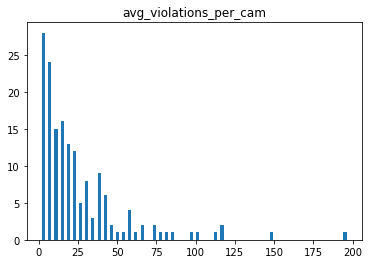

In [241]:
#plot histogram to see what number of average violations are the most common among the 162 active cameras

gpmean.hist(grid=False,bins=50,rwidth=0.5)
plt.show()


From this histogram we see most of the active cameras have a daily average number of violations that is below the mean. The maximun (CAMERA ID CHI149) at 197 daily violations is an outlier.

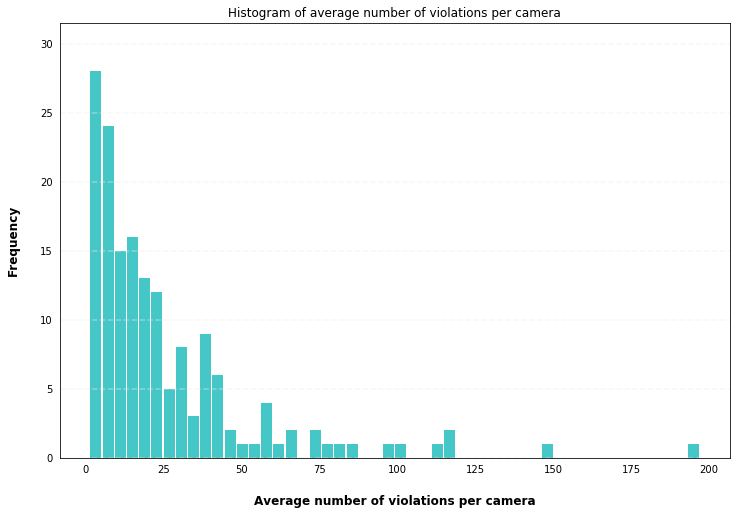

In [242]:
#customizing histogram to make it look nicer
ax = gpmean.hist(column='avg_violations_per_cam', bins=50, grid=False, figsize=(12,8), color='#46C7C7', rwidth=0.9)

ax = ax[0]
for x in ax:

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title
    x.set_title("Histogram of average number of violations per camera")

    # Set x-axis label
    x.set_xlabel("Average number of violations per camera", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

plt.show()

In [254]:
#plt.savefig("./avg_vio_hist.png")

*number of active cameras per day*

In [244]:
gpcam = df['CAMERA ID'].groupby(df['VIOLATION DATE'])
ncams=gpcam.size().reset_index(name='num_cams_per_day')

In [245]:
#gpcam.size().agg(['min','max']).reset_index(name='num_cams_per_day') 

In [246]:
ncams.head()

,VIOLATION DATE,num_cams_per_day
0,2014-07-01,95
1,2014-07-02,92
2,2014-07-03,94
3,2014-07-04,62
4,2014-07-05,63


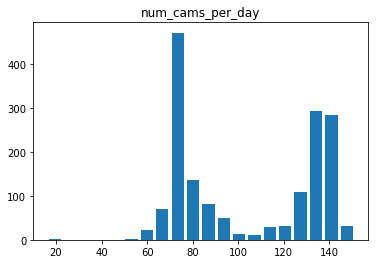

In [247]:
#plot histogram of number of active cameras per day
#ncams.plot(kind='hist',bins=[0,20,40,60,80,100,120,140,160],rwidth=0.6)
ncams.hist(grid=False,bins=20,rwidth=0.8)
plt.show()


This histogram shows that on almost all days there are over 60 active cameras. Most days have over 70 active cameras, with some above 100.

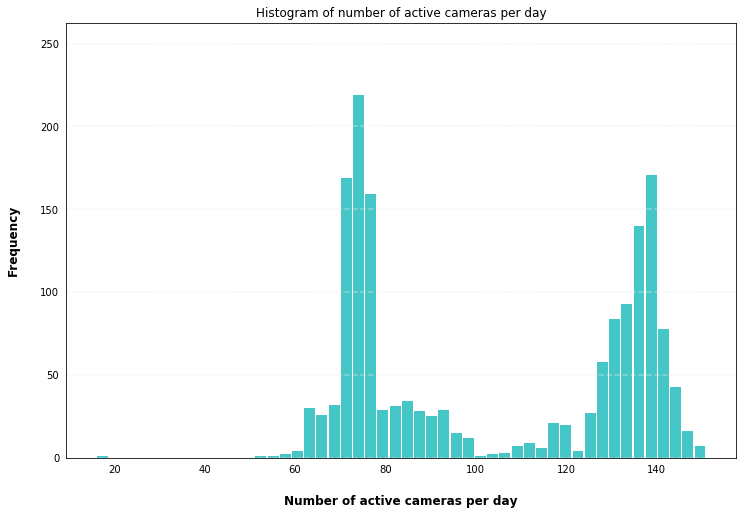

In [248]:
#customizing histogram to make it look nicer
ax = ncams.hist(column='num_cams_per_day', bins=50, grid=False, figsize=(12,8), color='#46C7C7', rwidth=0.9)

ax = ax[0]
for x in ax:

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title
    x.set_title("Histogram of number of active cameras per day")

    # Set x-axis label
    x.set_xlabel("Number of active cameras per day", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

plt.show()

In [255]:
#plt.savefig("./num_cams_hist.png")

In [250]:
#gpvio.mode().reset_index(name='avg_violations_per_cam')  #from Q1
ncams.describe()

,num_cams_per_day
count,1637.000000
mean,104.166768
std,30.138002
min,16.000000
25%,74.000000
50%,94.000000
75%,135.000000
max,151.000000


In [251]:
ncams.sort_values(by='num_cams_per_day',ascending=False).head(20)

,VIOLATION DATE,num_cams_per_day
1613,2018-11-30,151
1591,2018-11-08,150
1556,2018-10-04,149
1576,2018-10-24,149
1581,2018-10-29,149
1578,2018-10-26,149
1574,2018-10-22,149
1583,2018-10-31,148
1596,2018-11-13,148
1577,2018-10-25,148


Here we see the top 20 days with the highest number of active cameras are almost all in 2018, suggesting an overall increase in active cameras near the end of the collection period. This contradicts our conclusion for Q3. But could also be due to seasonal changes (most of these are in the Fall and Winter). We plot the number of active cameras per day below:

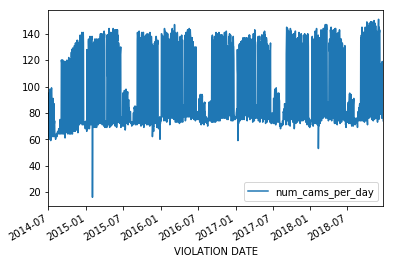

In [252]:
sortedcams=ncams.sort_values(by='num_cams_per_day',ascending=False)
sortedcams.plot(kind='line',x='VIOLATION DATE',y='num_cams_per_day')
plt.show()

There's an outlier in early 2015 which seems to have less than 20 active cameras, likely being the minimum in the collection period (16):

In [253]:
sortedcams.tail()

,VIOLATION DATE,num_cams_per_day
11,2014-07-12,59
926,2017-01-12,59
216,2015-02-02,54
1319,2018-02-09,53
215,2015-02-01,16


We see that indeed, the outlier is 2015-02-01, with only 16 active cameras that day.

Also in the plot above, there seems to be close to a periodic pattern of active cameras during each year which I did not expect. The dip occurs near the middle of each year. It's possible that during the summer when school's out there is less traffic, and fewer speed violation citations, or it was decided fewer cameras need to operate during the summer season. It could also looks artificial and could be due to problems in the code.

Also from this plot, we see the overall trend of active cameras is actually **increasing** in the entire collection period. This contradicts our conclusion in Q3. 